PAIRS TRADING STRATEGY - COMPLETE IMPLEMENTATION

[STEP 1] Configuration
--------------------------------------------------------------------------------
Pair: PEP & KO
Date Range: 2020-01-01 to 2025-01-01
Training Ratio: 70.0%

[STEP 2] Downloading Historical Data
--------------------------------------------------------------------------------


/tmp/ipython-input-1817197487.py:84: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([STOCK1, STOCK2], start=START_DATE, end=END_DATE)['Close']
[*********************100%***********************]  2 of 2 completed


Downloaded 1258 trading days
Date range: 2020-01-02 to 2024-12-31

Training set: 880 days (2020-01-02 to 2023-06-30)
Testing set: 378 days (2023-07-03 to 2024-12-31)

[STEP 3] Cointegration Analysis
--------------------------------------------------------------------------------
Cointegration Test Results:
  Test Statistic: -2.6747
  P-value: 0.2088
  ✗ Pair is NOT cointegrated (p >= 0.05) - Proceed with caution!

[STEP 4] Calculating Hedge Ratio
--------------------------------------------------------------------------------
Regression Results:
  PEP = -5.2964 + 2.8968 × KO
  R-squared: 0.8770
  Hedge Ratio (β): 2.8968

[STEP 5] Generating Trading Signals
--------------------------------------------------------------------------------
Spread Statistics:
  Mean: -10.3226
  Std Dev: 13.1889
  Z-score range: [-2.13, 1.58]

Signal Parameters:
  Entry Threshold: ±2.0 std dev
  Exit Threshold: ±0.5 std dev
  Total Entries: 1
  Total Exits: 1

[STEP 6] Running Backtest
----------------------

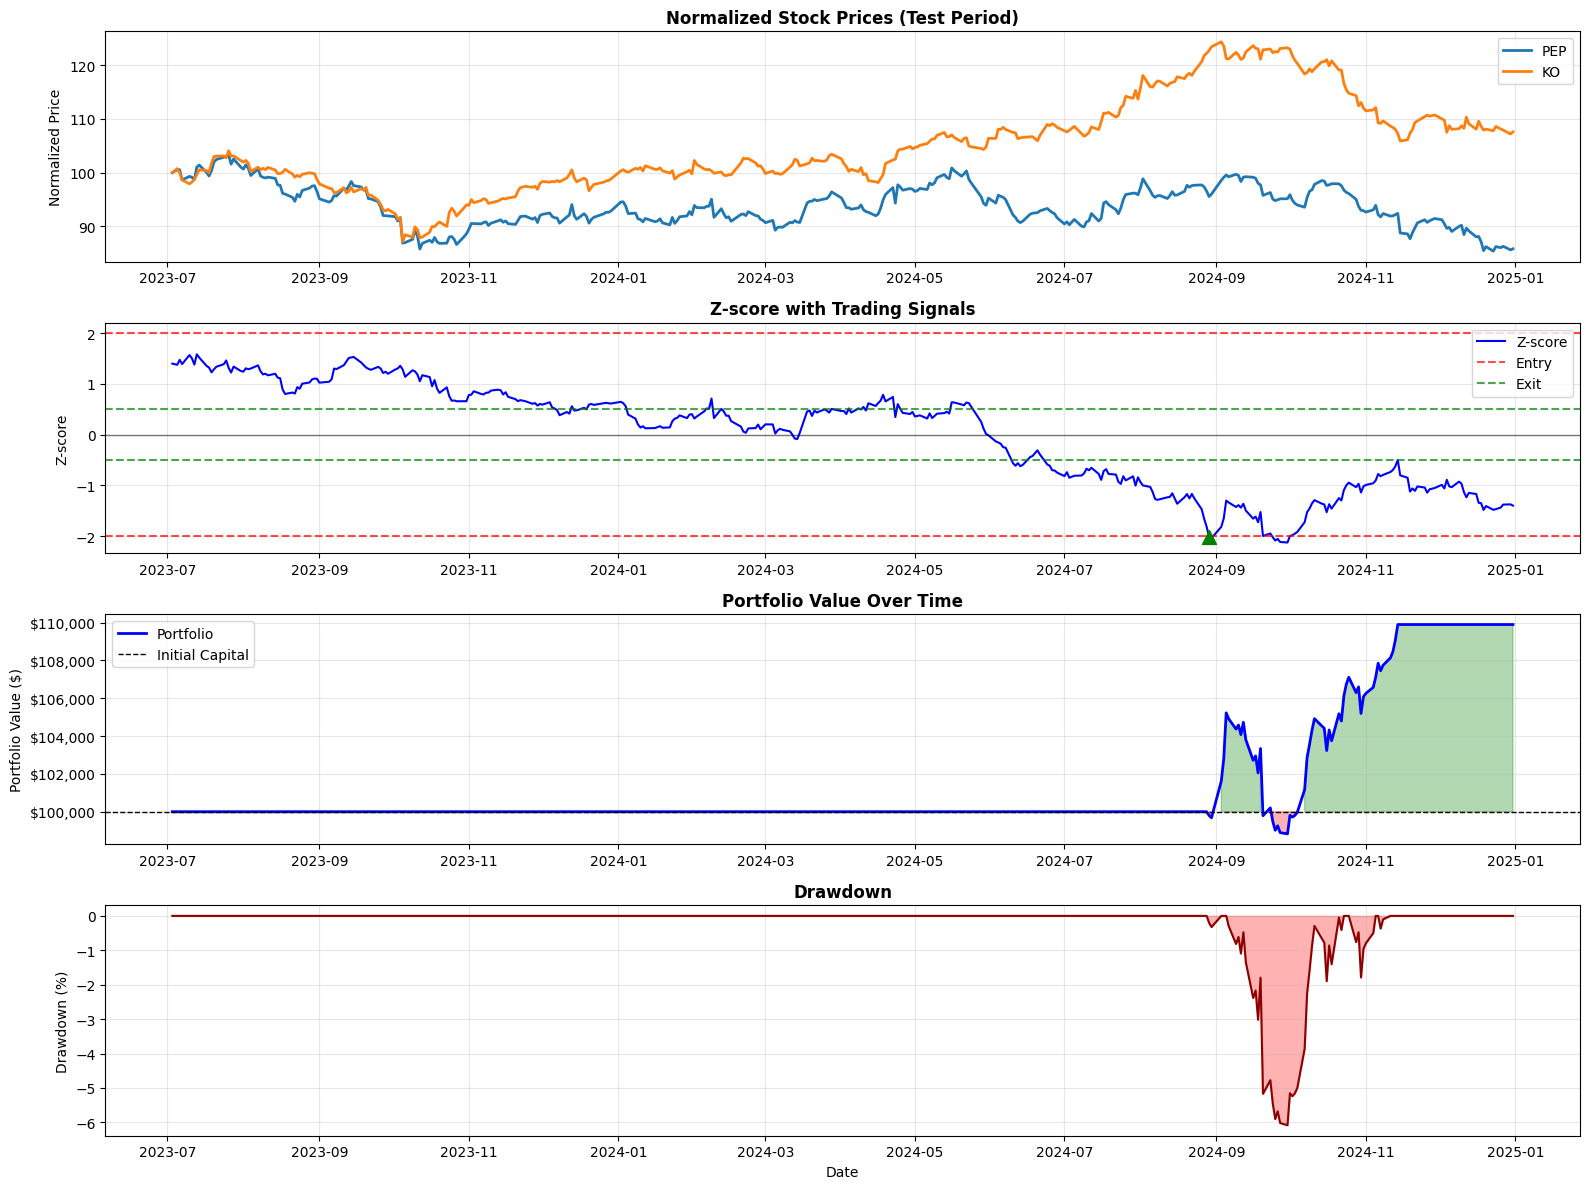


PAIRS TRADING STRATEGY COMPLETE!


In [ ]:
"""
COMPLETE PAIRS TRADING STRATEGY IMPLEMENTATION
================================================

This script demonstrates the complete workflow for implementing
a pairs trading strategy from scratch.

Steps:
1. Download historical data
2. Test for cointegration
3. Calculate hedge ratio
4. Generate trading signals
5. Backtest the strategy
6. Evaluate performance

Requirements:
- data_loader.py
- pairs_trading_core.py (PairsTradingStrategy class)
- pairs_backtest.py (PairsBacktester class)
"""

'''import sys
import warnings
warnings.filterwarnings('ignore')'''

# Assuming the modules are in the same directory or in PYTHONPATH
# from data_loader import DataLoader
# from pairs_trading_core import PairsTradingStrategy
# from pairs_backtest import PairsBacktester

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS

def main():
    """Main execution function"""

    print("="*80)
    print("PAIRS TRADING STRATEGY - COMPLETE IMPLEMENTATION")
    print("="*80)

    # ========================================================================
    # STEP 1: Configuration
    # ========================================================================
    print("\n[STEP 1] Configuration")
    print("-" * 80)

    # Select stock pairs to test
    # Popular cointegrated pairs:
    stock_pairs = [
        ['PEP', 'KO'],      # Pepsi & Coca-Cola
        ['GLD', 'GDX'],     # Gold ETFs
        ['CVX', 'XOM'],     # Oil companies
        ['WMT', 'TGT'],     # Retailers
    ]

    # Use first pair for this example
    STOCK1, STOCK2 = stock_pairs[0]

    # Date range
    START_DATE = '2020-01-01'
    END_DATE = '2025-01-01'

    # Strategy parameters
    TRAIN_RATIO = 0.7
    ENTRY_THRESHOLD = 2.0
    EXIT_THRESHOLD = 0.5
    INITIAL_CAPITAL = 100000
    COMMISSION = 0.001

    print(f"Pair: {STOCK1} & {STOCK2}")
    print(f"Date Range: {START_DATE} to {END_DATE}")
    print(f"Training Ratio: {TRAIN_RATIO*100}%")

    # ========================================================================
    # STEP 2: Download Data
    # ========================================================================
    print("\n[STEP 2] Downloading Historical Data")
    print("-" * 80)

    data = yf.download([STOCK1, STOCK2], start=START_DATE, end=END_DATE)['Close']
    data = data.dropna()

    print(f"Downloaded {len(data)} trading days")
    print(f"Date range: {data.index[0].date()} to {data.index[-1].date()}")

    # Split into training and testing sets
    split_idx = int(len(data) * TRAIN_RATIO)
    train_data = data.iloc[:split_idx]
    test_data = data.iloc[split_idx:]

    print(f"\nTraining set: {len(train_data)} days ({train_data.index[0].date()} to {train_data.index[-1].date()})")
    print(f"Testing set: {len(test_data)} days ({test_data.index[0].date()} to {test_data.index[-1].date()})")

    # ========================================================================
    # STEP 3: Cointegration Analysis (on training data)
    # ========================================================================
    print("\n[STEP 3] Cointegration Analysis")
    print("-" * 80)

    # Test cointegration
    score, pvalue, _ = coint(train_data[STOCK1], train_data[STOCK2])

    print(f"Cointegration Test Results:")
    print(f"  Test Statistic: {score:.4f}")
    print(f"  P-value: {pvalue:.4f}")

    if pvalue < 0.05:
        print(f"  ✓ Pair is COINTEGRATED (p < 0.05) - Good for pairs trading!")
    else:
        print(f"  ✗ Pair is NOT cointegrated (p >= 0.05) - Proceed with caution!")

    # ========================================================================
    # STEP 4: Calculate Hedge Ratio (on training data)
    # ========================================================================
    print("\n[STEP 4] Calculating Hedge Ratio")
    print("-" * 80)

    # OLS regression: S1 = alpha + beta * S2
    S1_train = train_data[STOCK1].values
    S2_train = train_data[STOCK2].values
    S2_with_const = np.column_stack([np.ones(len(S2_train)), S2_train])

    model = OLS(S1_train, S2_with_const).fit()
    hedge_ratio = model.params[1]
    intercept = model.params[0]

    print(f"Regression Results:")
    print(f"  {STOCK1} = {intercept:.4f} + {hedge_ratio:.4f} × {STOCK2}")
    print(f"  R-squared: {model.rsquared:.4f}")
    print(f"  Hedge Ratio (β): {hedge_ratio:.4f}")

    # ========================================================================
    # STEP 5: Generate Trading Signals (on test data)
    # ========================================================================
    print("\n[STEP 5] Generating Trading Signals")
    print("-" * 80)

    # Calculate spread on test data
    spread = test_data[STOCK1] - hedge_ratio * test_data[STOCK2]

    # Calculate z-score
    spread_mean = spread.mean()
    spread_std = spread.std()
    zscore = (spread - spread_mean) / spread_std

    print(f"Spread Statistics:")
    print(f"  Mean: {spread_mean:.4f}")
    print(f"  Std Dev: {spread_std:.4f}")
    print(f"  Z-score range: [{zscore.min():.2f}, {zscore.max():.2f}]")

    # Generate signals
    signals = pd.DataFrame(index=test_data.index)
    signals['price1'] = test_data[STOCK1]
    signals['price2'] = test_data[STOCK2]
    signals['spread'] = spread
    signals['zscore'] = zscore

    # Trading logic
    position = 0
    positions = []
    entries = []
    exits = []

    for i in range(len(signals)):
        z = signals['zscore'].iloc[i]

        if position == 0:
            if z < -ENTRY_THRESHOLD:
                position = 1  # Long spread
                entries.append(('LONG', signals.index[i], z))
            elif z > ENTRY_THRESHOLD:
                position = -1  # Short spread
                entries.append(('SHORT', signals.index[i], z))

        elif position == 1:
            if z > -EXIT_THRESHOLD:
                exits.append(('EXIT_LONG', signals.index[i], z))
                position = 0

        elif position == -1:
            if z < EXIT_THRESHOLD:
                exits.append(('EXIT_SHORT', signals.index[i], z))
                position = 0

        positions.append(position)

    signals['position'] = positions
    signals['signal'] = signals['position'].diff()

    print(f"\nSignal Parameters:")
    print(f"  Entry Threshold: ±{ENTRY_THRESHOLD} std dev")
    print(f"  Exit Threshold: ±{EXIT_THRESHOLD} std dev")
    print(f"  Total Entries: {len(entries)}")
    print(f"  Total Exits: {len(exits)}")

    # ========================================================================
    # STEP 6: Backtest Strategy
    # ========================================================================
    print("\n[STEP 6] Running Backtest")
    print("-" * 80)

    # Calculate returns
    signals['return1'] = signals['price1'].pct_change()
    signals['return2'] = signals['price2'].pct_change()

    # Strategy returns (Long S1 + Short S2 when position=1)
    signals['strategy_return'] = (
        signals['position'].shift(1) * signals['return1'] -
        signals['position'].shift(1) * signals['return2']
    )

    # Transaction costs
    signals['trade_flag'] = (signals['position'] != signals['position'].shift(1)).astype(int)
    signals['transaction_cost'] = signals['trade_flag'] * COMMISSION * 2
    signals['net_return'] = signals['strategy_return'] - signals['transaction_cost']

    # Cumulative returns
    signals['cumulative_return'] = (1 + signals['net_return'].fillna(0)).cumprod()
    signals['portfolio_value'] = INITIAL_CAPITAL * signals['cumulative_return']

    # Drawdown
    signals['peak'] = signals['portfolio_value'].expanding().max()
    signals['drawdown'] = (signals['portfolio_value'] - signals['peak']) / signals['peak']

    # ========================================================================
    # STEP 7: Performance Metrics
    # ========================================================================
    print("\n[STEP 7] Performance Metrics")
    print("-" * 80)

    returns = signals['net_return'].dropna()

    # Calculate metrics
    total_return = (signals['portfolio_value'].iloc[-1] / INITIAL_CAPITAL - 1) * 100

    trading_days = 252
    n_years = len(returns) / trading_days
    annual_return = ((1 + total_return/100) ** (1/n_years) - 1) * 100
    annual_vol = returns.std() * np.sqrt(trading_days) * 100

    sharpe = (annual_return/100 - 0.02) / (annual_vol/100) if annual_vol > 0 else 0

    max_dd = signals['drawdown'].min() * 100

    winning_trades = (returns > 0).sum()
    total_trades = (returns != 0).sum()
    win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0

    print(f"\n{'='*80}")
    print(f"BACKTEST RESULTS")
    print(f"{'='*80}")
    print(f"\n📊 RETURNS:")
    print(f"   Total Return:          {total_return:>10.2f}%")
    print(f"   Annualized Return:     {annual_return:>10.2f}%")
    print(f"   Annualized Volatility: {annual_vol:>10.2f}%")
    print(f"\n📈 RISK-ADJUSTED:")
    print(f"   Sharpe Ratio:          {sharpe:>10.2f}")
    print(f"   Maximum Drawdown:      {max_dd:>10.2f}%")
    print(f"\n💰 TRADING:")
    print(f"   Total Trades:          {total_trades:>10.0f}")
    print(f"   Win Rate:              {win_rate:>10.2f}%")
    print(f"\n💵 PORTFOLIO:")
    print(f"   Initial Capital:       ${INITIAL_CAPITAL:>10,.2f}")
    print(f"   Final Value:           ${signals['portfolio_value'].iloc[-1]:>10,.2f}")
    print(f"   Profit/Loss:           ${signals['portfolio_value'].iloc[-1] - INITIAL_CAPITAL:>10,.2f}")
    print(f"{'='*80}\n")

    # ========================================================================
    # STEP 8: Visualization
    # ========================================================================
    print("\n[STEP 8] Generating Visualizations")
    print("-" * 80)

    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Normalized prices
    ax1 = plt.subplot(4, 1, 1)
    norm1 = test_data[STOCK1] / test_data[STOCK1].iloc[0] * 100
    norm2 = test_data[STOCK2] / test_data[STOCK2].iloc[0] * 100
    ax1.plot(norm1, label=STOCK1, linewidth=2)
    ax1.plot(norm2, label=STOCK2, linewidth=2)
    ax1.set_title('Normalized Stock Prices (Test Period)', fontweight='bold', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylabel('Normalized Price')

    # Plot 2: Spread and Z-score with signals
    ax2 = plt.subplot(4, 1, 2)
    ax2.plot(signals['zscore'], linewidth=1.5, color='blue', label='Z-score')
    ax2.axhline(ENTRY_THRESHOLD, color='red', linestyle='--', label='Entry', alpha=0.7)
    ax2.axhline(-ENTRY_THRESHOLD, color='red', linestyle='--', alpha=0.7)
    ax2.axhline(EXIT_THRESHOLD, color='green', linestyle='--', label='Exit', alpha=0.7)
    ax2.axhline(-EXIT_THRESHOLD, color='green', linestyle='--', alpha=0.7)
    ax2.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    # Mark entries and exits
    for entry_type, date, z in entries:
        if entry_type == 'LONG':
            ax2.scatter(date, z, color='green', marker='^', s=100, zorder=5)
        else:
            ax2.scatter(date, z, color='red', marker='v', s=100, zorder=5)

    ax2.set_title('Z-score with Trading Signals', fontweight='bold', fontsize=12)
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylabel('Z-score')

    # Plot 3: Portfolio value
    ax3 = plt.subplot(4, 1, 3)
    ax3.plot(signals['portfolio_value'], linewidth=2, color='blue', label='Portfolio')
    ax3.axhline(INITIAL_CAPITAL, color='black', linestyle='--', linewidth=1, label='Initial Capital')
    ax3.fill_between(signals.index, INITIAL_CAPITAL, signals['portfolio_value'],
                     where=signals['portfolio_value'] >= INITIAL_CAPITAL,
                     alpha=0.3, color='green')
    ax3.fill_between(signals.index, INITIAL_CAPITAL, signals['portfolio_value'],
                     where=signals['portfolio_value'] < INITIAL_CAPITAL,
                     alpha=0.3, color='red')
    ax3.set_title('Portfolio Value Over Time', fontweight='bold', fontsize=12)
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylabel('Portfolio Value ($)')
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    # Plot 4: Drawdown
    ax4 = plt.subplot(4, 1, 4)
    ax4.fill_between(signals.index, 0, signals['drawdown']*100, alpha=0.3, color='red')
    ax4.plot(signals['drawdown']*100, linewidth=1.5, color='darkred')
    ax4.set_title('Drawdown', fontweight='bold', fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.set_ylabel('Drawdown (%)')
    ax4.set_xlabel('Date')

    plt.tight_layout()
    plt.savefig('pairs_trading_results.png', dpi=300, bbox_inches='tight')
    print("Visualization saved as 'pairs_trading_results.png'")

    plt.show()

    print("\n" + "="*80)
    print("PAIRS TRADING STRATEGY COMPLETE!")
    print("="*80)

    return signals

if __name__ == "__main__":
    results = main()